**Initial image generation testing**

rcwsalg and zernike are libraries written to do
1. Generation of an expected image using the transport of intensities equation below
2. Conversion from 2D array of intensity values to zernike space and visa-versa

In [12]:
import rcwsalg
import zernike
import matplotlib.pyplot as plt
import matplotlib.cm as cm
pylab.rcParams['figure.figsize'] = (10, 6)

Now, I try to compute representations of the images that we will see, using the transport of intensities equation (explanation of equation at bottom of notebook):
\begin{equation}
   \frac{\partial I}{\partial z} = \frac{\lambda F \left(F-l\right)}{2\pi l} \left[\frac{\partial}{\partial n}\phi\left(\frac{F\overrightarrow{r}}{l}\right) \delta_c - \nabla^2 \phi\left(\frac{F\overrightarrow{r}}{l}\right)\right]
\end{equation}

Note that for my implementation, so far I am neglecting $\frac{\partial}{\partial n}\phi\left(\frac{F\overrightarrow{r}}{l}\right) \delta_c$, and I am setting the term $\frac{\lambda F \left(F-l\right)}{2\pi l} = 1$

To compute the laplacian on an image F, where $F(x,y)$ denotes the pixel value at $(x,y)$, I am doing the following operation
\begin{equation}
\nabla^2 F(x,y) = F(x+1,y) + F(x-1,y) + F(x,y+1) + F(x,y-1) - 4F(x,y)
\end{equation}

Below, I generate images corrisponding to $\pm\frac{\partial I}{\partial z}$, for zernike modes 1-15

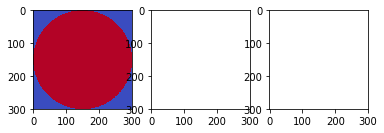

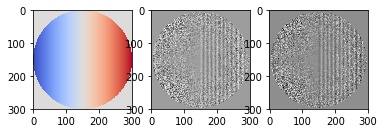

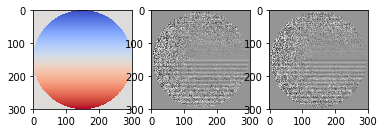

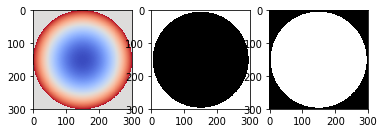

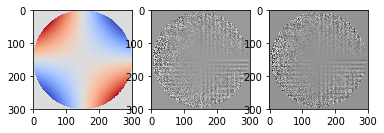

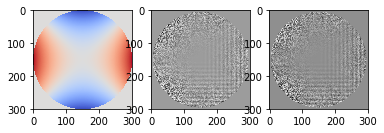

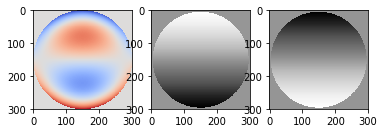

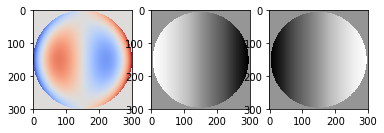

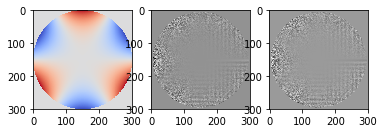

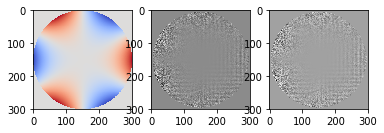

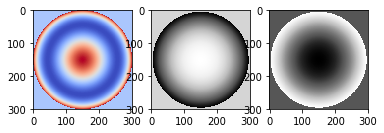

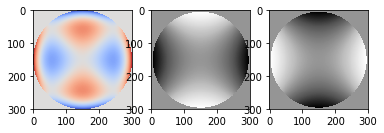

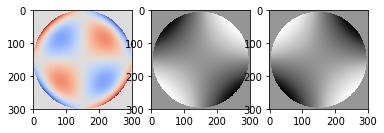

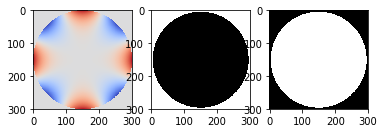

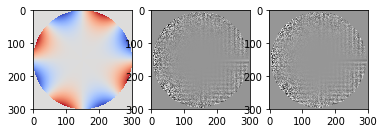

In [8]:
for i in range(15):
    #Set all of the coefficients to zero, except the one of interest
    coeff = [0]*i + [0.1] + [0]*(14-i)
    #Take the zernike coefficients and generate an intensity map
    wavefront = zernike.generate_wavefront(coeff, 300, 300)
    #Take the intensity map and generate the expected images
    im1, im2 = rcwsalg.computeImages(wavefront)
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(wavefront, cmap=cm.coolwarm)
    plt.subplot(1, 3, 2)
    plt.imshow(im1, cmap=cm.Greys)
    plt.subplot(1, 3, 3)
    plt.imshow(im2, cmap=cm.Greys)
    plt.show()

A close up view of the results for astigmatism are below. Note that it seems to just be random noise. The first set shows the laplacian in total, the set after shows the second derivatives in x and y computed seperately as
\begin{equation}
    \frac{\partial^2}{\partial^2 x}F(x,y) = F(x+1, y) + F(x-1, y) - 2F(x,y)
\end{equation}
\begin{equation}
    \frac{\partial^2}{\partial^2 y}F(x,y) = F(x, y+1) + F(x, y-1) - 2F(x,y)
\end{equation}

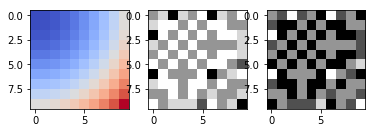

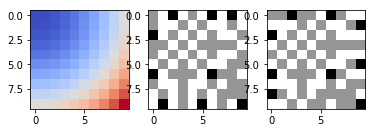

In [19]:
#Return just a small section of the image
def sliceim(im):
    return [r[100:110] for r in im[100:110]]

#Generate the laplacian image
coeff = [0,0,0,0.1]
wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

#Generate the individual second derivative images
wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront, givederivs = True)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

For trefoil, the second derivatives seem to cancel each other out

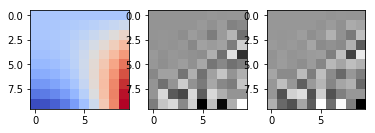

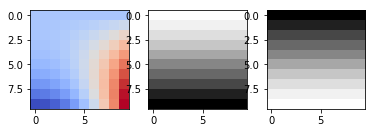

In [36]:
def sliceim(im):
    return [r[100:110] for r in im[100:110]]

coeff = [0,0,0,0,0,0,0,0,0.1]
wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

wavefront = zernike.generate_wavefront(coeff, 200, 200)
im1, im2 = rcwsalg.computeImages(wavefront, givederivs = True)
wavefront = sliceim(wavefront)
im1 = sliceim(im1)
im2 = sliceim(im2)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(wavefront, cmap=cm.coolwarm)
plt.subplot(1, 3, 2)
plt.imshow(im1, cmap=cm.Greys)
plt.subplot(1, 3, 3)
plt.imshow(im2, cmap=cm.Greys)
plt.show()

Below are all of the zernike modes and the computed second derivatives in x and y

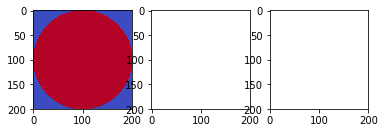

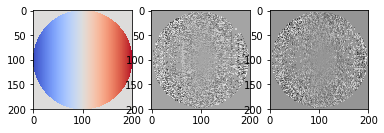

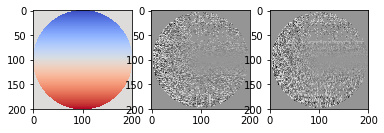

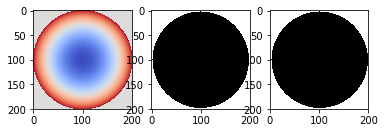

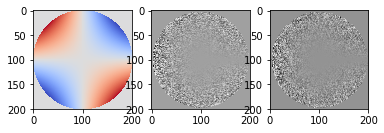

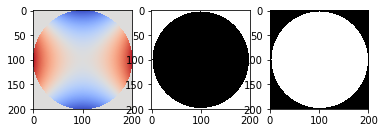

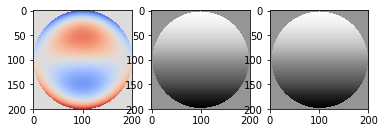

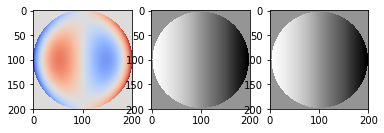

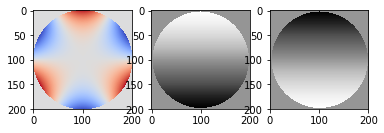

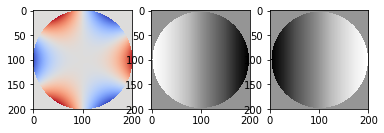

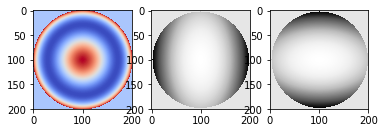

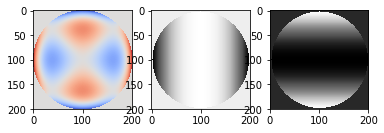

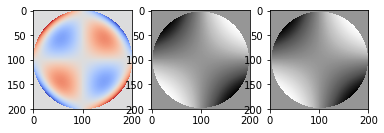

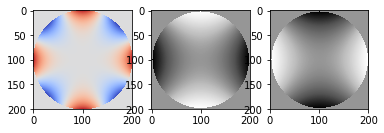

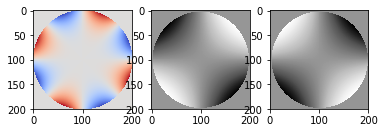

In [15]:
for i in range(15):
    coeff = [0]*i + [0.1] + [0]*(14-i)
    wavefront = zernike.generate_wavefront(coeff, 200, 200)
    im1, im2 = rcwsalg.computeImages(wavefront, givederivs = True)
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(wavefront, cmap=cm.coolwarm)
    plt.subplot(1, 3, 2)
    plt.imshow(im1, cmap=cm.Greys)
    plt.subplot(1, 3, 3)
    plt.imshow(im2, cmap=cm.Greys)
    plt.show()

Finally, here it is on a few random wavefronts

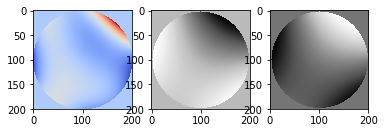

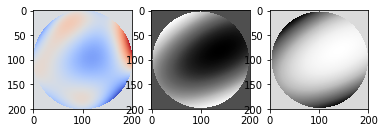

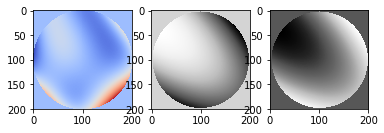

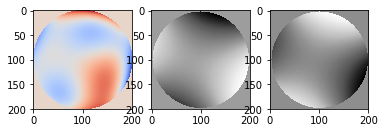

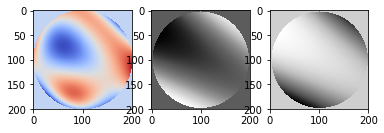

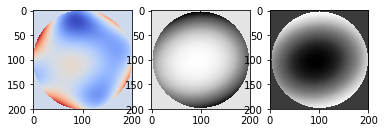

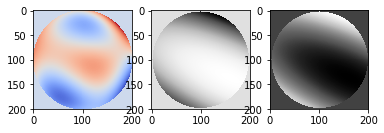

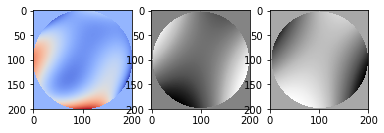

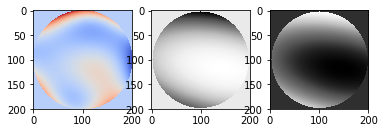

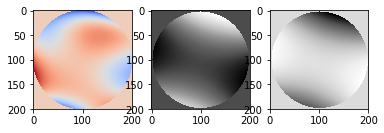

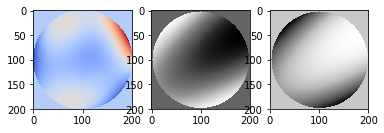

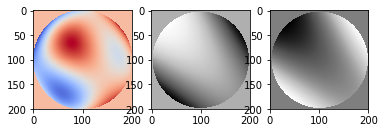

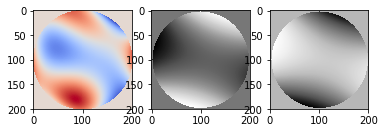

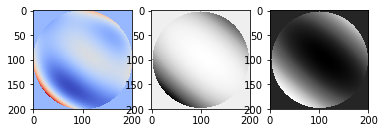

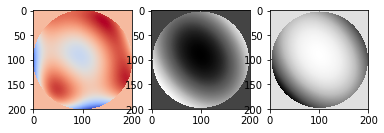

In [41]:
import random
random.seed(1254394)

for i in range(15):
    rand_coef = [random.random()-0.5 for i in range(15)]
    wavefront = zernike.generate_wavefront(rand_coef, 200, 200)
    im1, im2 = rcwsalg.computeImages(wavefront)

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(wavefront, cmap=cm.coolwarm)
    plt.subplot(1, 3, 2)
    plt.imshow(im1, cmap=cm.Greys)
    plt.subplot(1, 3, 3)
    plt.imshow(im2, cmap=cm.Greys)
    plt.show()

From the results above, the conclusion can be made that the first derivative term in the TIE will be of key importance to simulate the expected output of the RCWS. As such the term corrisponding to $\frac{\partial}{\partial n}\phi\left(\frac{F\overrightarrow{r}}{l}\right) \delta_c$ will need to be generated, and used to shift the boundrary such that it is non circular

\begin{equation}
   \frac{\partial I}{\partial z} = \frac{\lambda F \left(F-l\right)}{2\pi l} \left[\frac{\partial}{\partial n}\phi\left(\frac{F\overrightarrow{r}}{l}\right) \delta_c - \nabla^2 \phi\left(\frac{F\overrightarrow{r}}{l}\right)\right]
\end{equation}

$\frac{\partial I}{\partial z}$ is the rate of change of the intesity along the optical axis (approximately the difference in intensity in the two images).

$F$ is the focal length, $\lambda$ is the wavelength, and $l$ is the distance between where the two images are taken.

$\frac{\partial}{\partial n}\phi\left(\frac{F\overrightarrow{r}}{l}\right) \delta_c$ is the slope of the wavefront, along the edge of the beam

$\nabla^2 \phi\left(\frac{F\overrightarrow{r}}{l}\right)$ is the laplacian of the waveform (the amount of curvature)